# Setting Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy as stats

sns.set(color_codes=True)
sns.set_style("dark")
sns.set_context("poster")
matplotlib.rcParams['text.color'] = 'white'
        
monster = "galleon"
filename = monster + "_20200409.csv"

BASE_STATS = {
    'HP': 11535,
    'ATTACK': 714,
    'DEFENSE': 494,
    'SPEED': 108,
    'CRIT_RATE': .15,
    'CRIT_DMG': .5,
    'ACCURACY%': 0,
    'RESISTANCE%': 15,
}

TOWERS = {
    'CRIT_DMG': .25,
    'SPEED': .15,
    'ATTACK': .20,
    'ATTACK_ELEMENT': .21,
    'DEFENSE': .20,
    'HP': .20,
}

BUFFS = {
    'ATTACK': 1.5,
    'SPEED': .3,
    'CRIT_RATE': .3,
    'DEFENSE': 1.5,
}

df = pd.read_csv(filename, index_col="ID")
df_full = pd.read_csv(filename, index_col="ID")
print(df.columns)
runes_cols = ["Rune #" + str(i) for i in range(1 ,7)]
df.dropna(subset=runes_cols, how='any', inplace=True) # delete without runes
df.sort_values(["Avg Eff"], ascending=False, inplace=True)
df

Index(['Level', 'Stars', 'HP', 'Attack', 'Defense', 'Speed', 'Resistance',
       'Accuracy', 'Crit Rate', 'Crit Dmg', 'Avg Eff', 'Eff. HP',
       'Eff. HP D-B', 'Sets', 'Skilled Up', 'Acquired', 'Locked',
       'Transmogrified', 'Rune #1', 'Rune #2', 'Rune #3', 'Rune #4', 'Rune #5',
       'Rune #6'],
      dtype='object')


,Level,Stars,HP,Attack,Defense,Speed,Resistance,Accuracy,Crit Rate,Crit Dmg,...,Skilled Up,Acquired,Locked,Transmogrified,Rune #1,Rune #2,Rune #3,Rune #4,Rune #5,Rune #6
ID,,,,,,,,,,,,,,,,,,,,,
6086701542,40,6,46512,1494,1104,213,46,42,20,85,...,Yes,2016-03-16 17:38:02,No,No,ATK+,HP%,DEF+,HP%,HP+,HP%
8846943833,40,6,29493,2032,1079,217,15,69,56,54,...,Yes,2017-03-20 17:37:49,No,Yes,ATK+,SPD,DEF+,HP%,HP+,ATK%
6400702292,40,6,27255,1246,696,266,39,86,67,141,...,Yes,2016-04-25 14:37:22,No,Yes,ATK+,SPD,DEF+,CDmg%,HP+,ACC%
10903892754,40,6,26708,1536,831,232,21,77,50,151,...,Yes,2018-01-21 14:46:06,No,Yes,ATK+,SPD,DEF+,CDmg%,HP+,ACC%
8132746009,40,6,30017,1531,1065,200,15,48,78,142,...,Yes,2016-12-14 13:08:50,No,Yes,ATK+,ATK%,DEF+,CDmg%,HP+,HP%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11788081119,35,5,13433,663,507,163,41,83,15,76,...,No,2018-06-28 20:08:11,No,No,ATK+,SPD,DEF+,HP%,HP+,ACC%
9060538783,35,5,14928,582,484,202,15,50,25,62,...,No,2017-04-17 18:02:42,No,No,ATK+,SPD,DEF+,HP%,HP+,ACC%
13369577812,40,6,14381,916,544,168,21,17,29,60,...,No,2019-04-23 18:48:48,No,No,ATK+,SPD,DEF+,HP+,HP+,ACC%


# Stars Distribution, picking 6*

(480, 24)


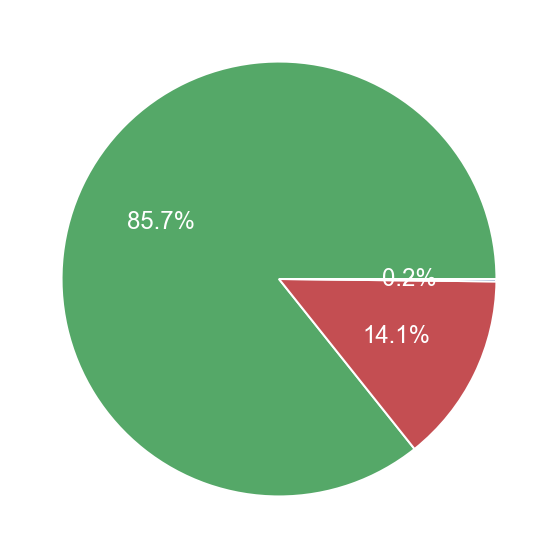

In [2]:
fig = plt.figure(figsize=(10, 10))
stars = df["Stars"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_6stars.png", transparent=True, bbox_inches = "tight")
df_stars6 = df[df["Stars"] == 6] # pick only 6*
print(df_stars6.shape)

# Skilled Up

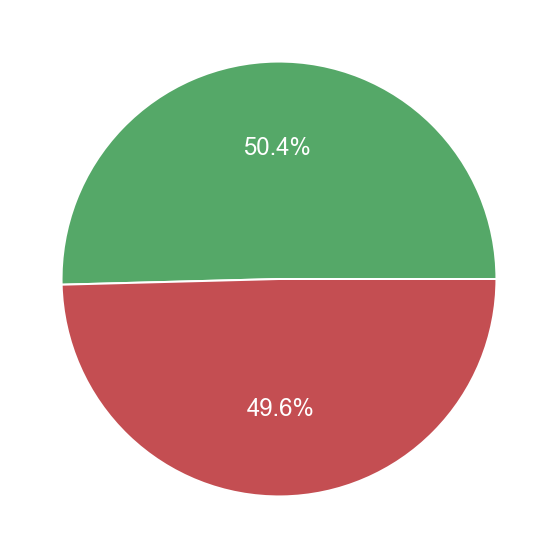

In [3]:
fig = plt.figure(figsize=(10, 10))
stars = df_stars6["Skilled Up"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r'])
plt.savefig(monster + "_pie_skillups.png", transparent=True, bbox_inches = "tight")
plt.show()

# Transmogrified

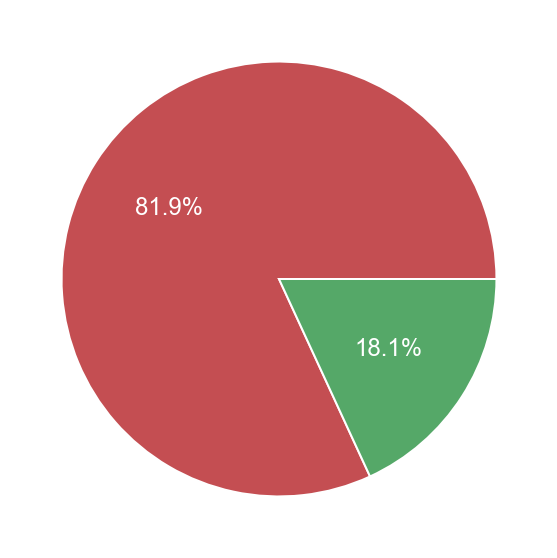

In [4]:
fig = plt.figure(figsize=(10, 10))
stars = df_stars6["Transmogrified"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['r', 'g'])
plt.savefig(monster + "_pie_transmog.png", transparent=True, bbox_inches = "tight")
plt.show()

# Runes 

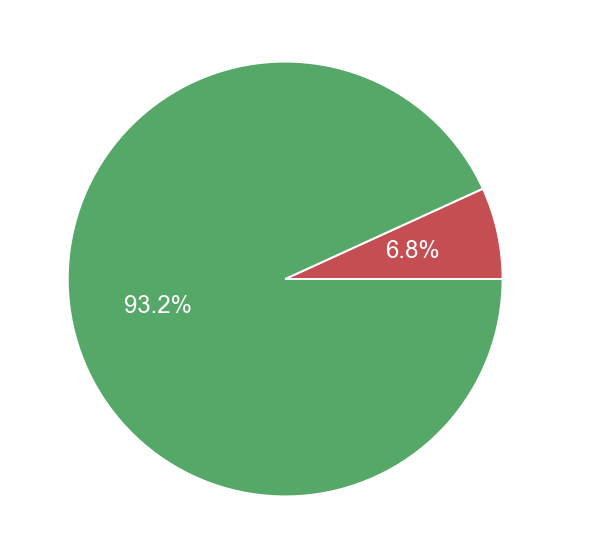

In [5]:
fig = plt.figure(figsize=(10, 10))
df_runes = {
    'Without': df_full.shape[0] - df.shape[0],
    'With': df.shape[0],
}
plt.pie(df_runes.values(), labels=df_runes.keys(), autopct='%1.1f%%', colors=['r', 'g'])
plt.savefig(monster + "_pie_runes.png", transparent=True, bbox_inches = "tight")
plt.show()

# Accuracy PvP, PvE, Other Pie

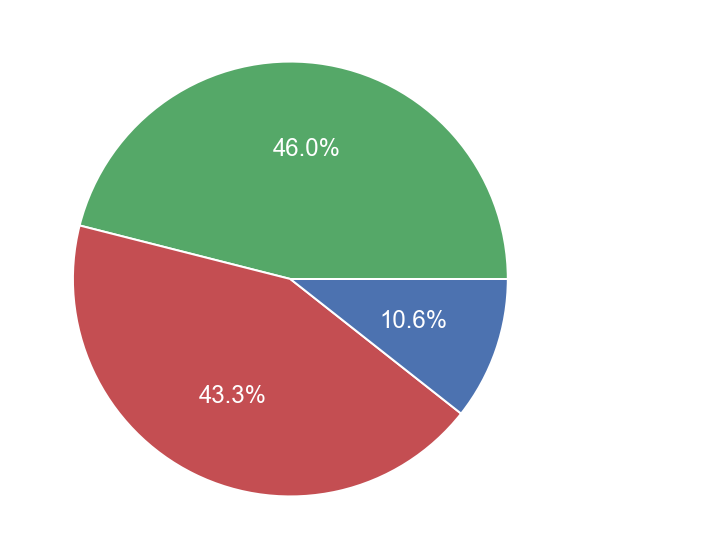

In [6]:
fig = plt.figure(figsize=(10, 10))
acc_pvp = df_stars6[df_stars6["Accuracy"] >= 85]
acc_pve = df_stars6[(df_stars6["Accuracy"] < 85) & (df_stars6["Accuracy"] >= 45)]
acc_other = df_stars6[df_stars6["Accuracy"] < 45]
acc_content = {
    'Over 85% [PvP]': acc_pvp.shape[0],
    '45% to 85% [PvE]': acc_pve.shape[0],
    'Under 45% [Other]': acc_other.shape[0],
}
plt.pie(acc_content.values(), labels=acc_content.keys(), autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_accuracy.png", transparent=True, bbox_inches = "tight")
plt.show()

# Tanky vs DMG Dealer

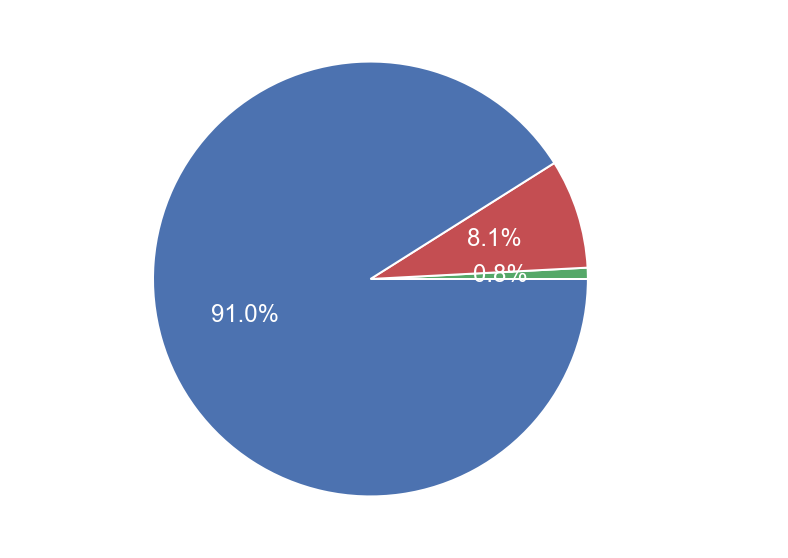

In [7]:
fig = plt.figure(figsize=(10, 10))
dmg_dealer_df = df_stars6[(df_stars6["Crit Rate"] > 60) & (df_stars6["Crit Dmg"] > 150)] # shows mons with 60%+ crit rate & 150%+ crit damage
pseudo_dmg_dealer_df = df_stars6[(df_stars6["Attack"] > 1500) & (df_stars6["Crit Rate"] < 60)]
pie_dmg_or_tanky = {
    'Damage Dealer \n[60%+ crit rate,\n 150% + crit dmg]': dmg_dealer_df.shape[0],
    'Squishy \n[High ATK]': pseudo_dmg_dealer_df.shape[0],
    'Other [Tanky]': df_stars6.shape[0] - pseudo_dmg_dealer_df.shape[0] - dmg_dealer_df.shape[0],
}
plt.pie(pie_dmg_or_tanky.values(), labels=pie_dmg_or_tanky.keys(), autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_is_tanky.png", transparent=True, bbox_inches = "tight")
plt.show()

# Eff. HP Distribution

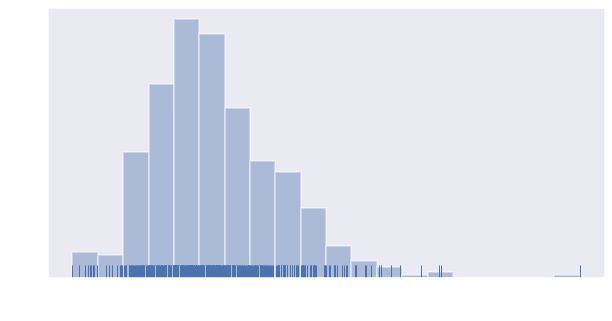

In [8]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff. HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_effhp.png", transparent=True, bbox_inches = "tight")

# Avg. Rune Distribution

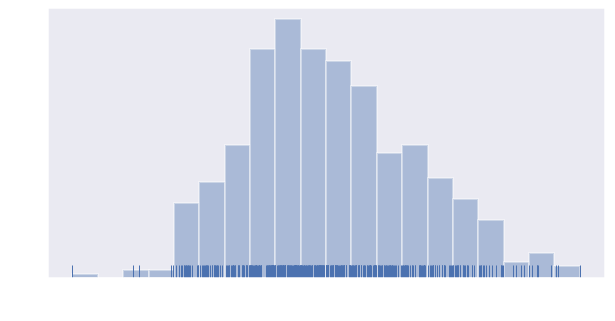

In [9]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Avg Eff"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_rune_eff.png", transparent=True, bbox_inches = "tight")

# Sets

Focus + Swift              66
Shield + Shield + Will     44
Violent + Will             37
Focus + Violent            34
Energy + Swift             32
Swift                      24
Focus + Shield + Will      22
Violent                    22
Shield + Violent           20
Shield + Swift             18
Swift + Will               17
Shield + Will              17
Energy + Violent           12
Fight + Shield + Will      10
Revenge + Violent           9
Fight + Fight + Will        8
Revenge + Swift             6
Fight + Swift               6
Blade + Swift               6
Blade + Violent             4
Nemesis + Violent           4
Nemesis + Swift             3
Guard + Swift               3
Fight + Fight + Focus       3
Revenge + Shield + Will     2
Fight + Fight + Shield      2
Blade + Rage                2
Guard + Violent             2
Fight + Fight + Fight       2
Guard + Shield + Will       2
Focus + Focus + Revenge     2
Fight + Fight               2
Will                        2
Guard     

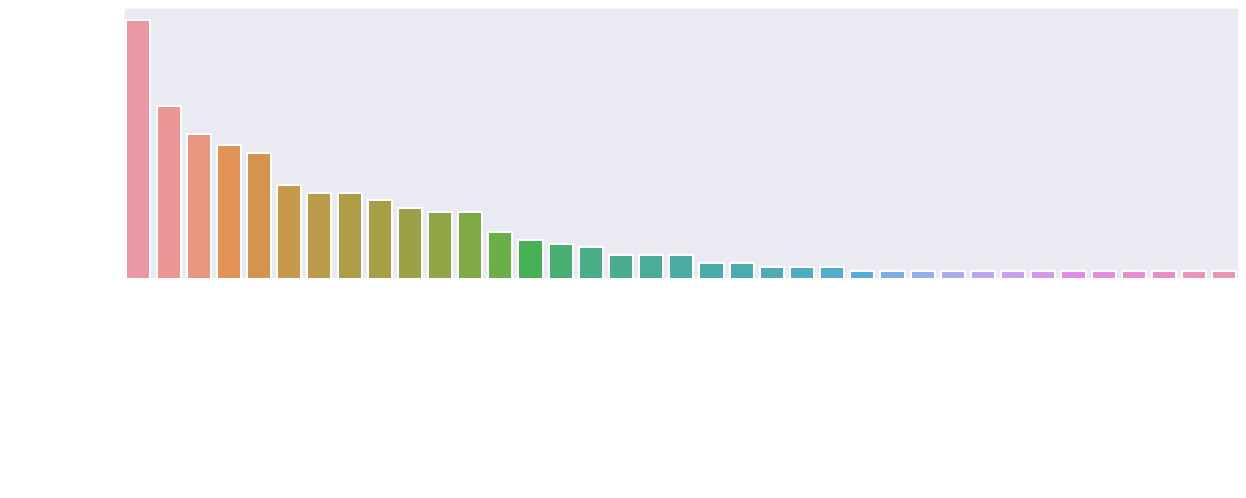

In [10]:
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
counts = counts[counts > 1]
print(counts)
x, y = counts.index, counts.values
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_sets.png", transparent=True, bbox_inches = "tight")

# Eff. HP Distribution for most common set

Focus + Swift


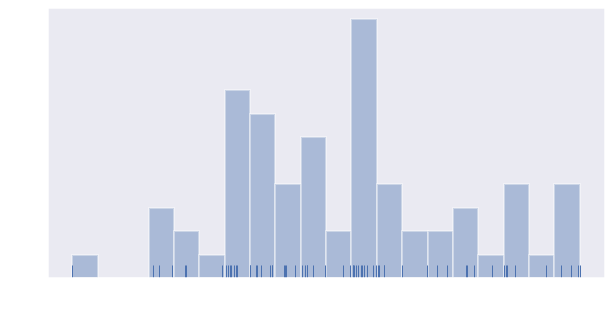

In [11]:
most_common_set = counts.index[0]
print(most_common_set)

fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff. HP"][df_stars6["Sets"] == most_common_set], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_common_set_effhp.png", transparent=True, bbox_inches = "tight")

# Set for Highest Avg Eff

In [12]:
highest_effhp_set = df_stars6.iloc[:1]["Sets"].values[0]
print(highest_effhp_set)

Energy + Energy + Guard


# Eff. HP for set with Highest Eff

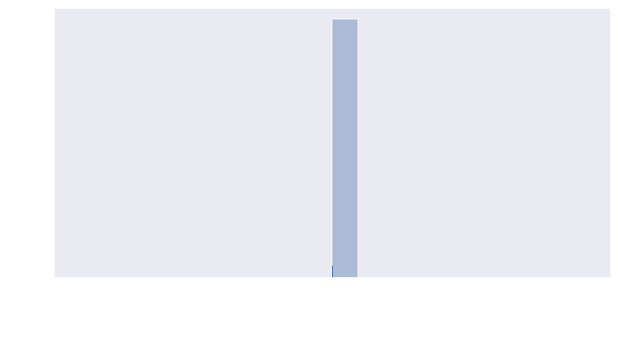

In [13]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff. HP"][df_stars6["Sets"] == highest_effhp_set], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_effhp_set.png", transparent=True,  bbox_inches = "tight")

# Speed Distribution

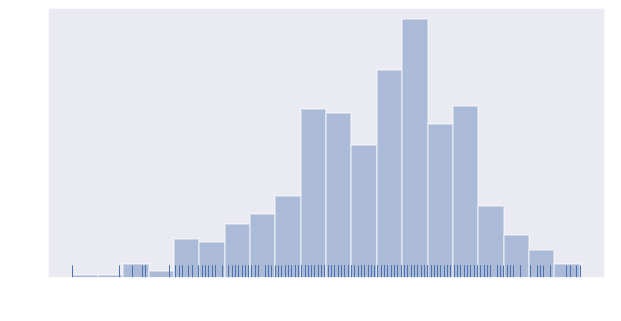

In [14]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed.png", transparent=True,  bbox_inches = "tight")

# Speed - Eff. HP Relation

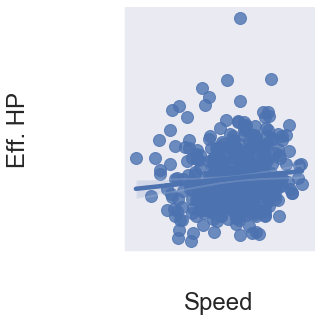

In [15]:
sns.lmplot(x="Speed", y="Eff. HP", data=df_stars6)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_rel_spd_effhp.png", transparent=True,  bbox_inches = "tight")

# Speed Distribution for TOP 10% Eff. HP

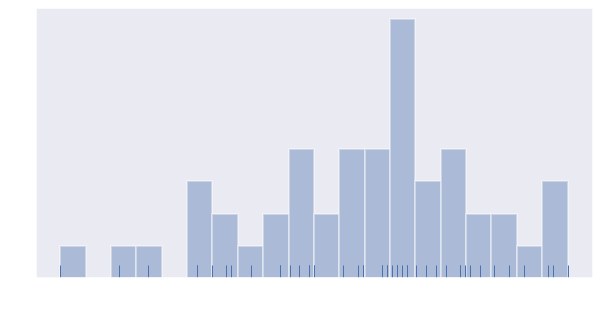

In [16]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"].head(int(df_stars6.shape[0] * .1)), bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Speed - Eff. HP Relation for TOP 10% Eff. HP

<Figure size 720x360 with 0 Axes>

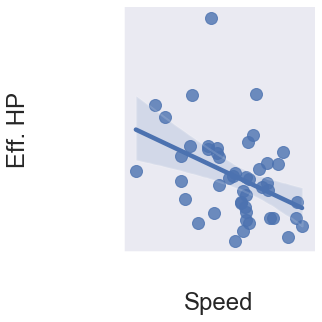

In [17]:
fig = plt.figure(figsize=(10, 5))
sns.lmplot(x="Speed", y="Eff. HP", data=df_stars6.head(int(df_stars6.shape[0] * .1)))
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_rel_spd_dmg_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Best by Category

In [18]:
cols = ['HP', 'Attack', 'Defense', 'Speed', 'Resistance', 'Accuracy', 'Crit Rate', 'Crit Dmg', 'Avg Eff', 'Eff. HP', 'Eff. HP D-B']
df_best = pd.DataFrame(columns=["ID"] + cols)
df_best.set_index("ID", drop=True, inplace=True)

best = list()
for column in cols:
    best.append(int(round(df.sort_values([column], ascending=False)[column].head(1).values[0])))
    
df_best.loc[1] = best
df_best

,HP,Attack,Defense,Speed,Resistance,Accuracy,Crit Rate,Crit Dmg,Avg Eff,Eff. HP,Eff. HP D-B
ID,,,,,,,,,,,
1,46512,2129,1515,270,102,129,104,188,109,232746,106940


# First & last Monster

In [19]:
newest = df_stars6.sort_values(["Acquired"], ascending=False)["Acquired"].head(1).values[0]
oldest = df_stars6.sort_values(["Acquired"], ascending=False)["Acquired"].tail(1).values[0]
print(oldest, newest)

2015-06-03 18:16:04 2020-03-04 23:43:17


# Most common Builds

   Rune #2 Rune #4 Rune #6  Count
42     SPD     HP%    ACC%    168
45     SPD     HP%     HP%     62
21     SPD    ATK%    ACC%     30
36     SPD    DEF%    ACC%     27
31     SPD  CRate%    ACC%     22
27     SPD   CDmg%    ACC%     18
43     SPD     HP%    ATK%     17
25     SPD    ATK%     HP%     15
39     SPD    DEF%     HP%     14
44     SPD     HP%    DEF%     13
17     HP%     HP%    ACC%     10
22     SPD    ATK%    ATK%     10
30     SPD   CDmg%     HP%      7


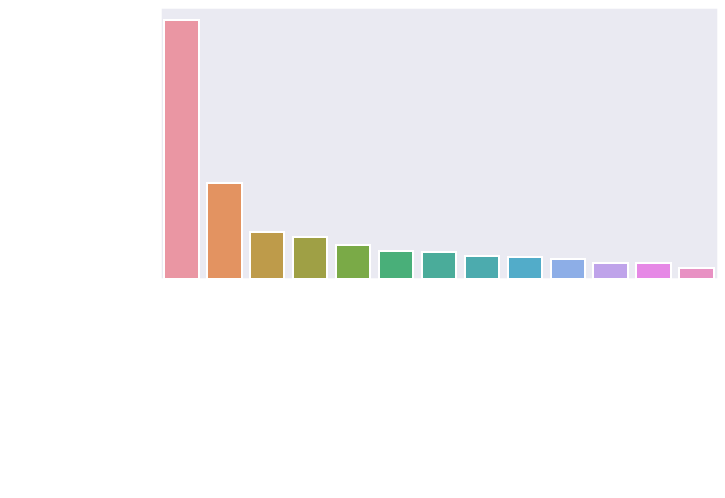

In [20]:
fig = plt.figure(figsize=(10, 5))

builds_count = df_stars6.groupby(["Rune #2", "Rune #4", "Rune #6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 5].sort_values(["Count"], ascending=False) # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Rune #2", "Rune #4", "Rune #6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
_ = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common.png", transparent=True, bbox_inches = "tight")

# Builds for most common set

   Rune #2 Rune #4 Rune #6  Count
12     SPD     HP%    ACC%     18
15     SPD     HP%     HP%     16
11     SPD    DEF%     HP%      6
3      SPD    ATK%     HP%      5
13     SPD     HP%    ATK%      4
14     SPD     HP%    DEF%      3
1      SPD    ATK%    ACC%      2
2      SPD    ATK%    ATK%      2
5      SPD   CDmg%    ACC%      2


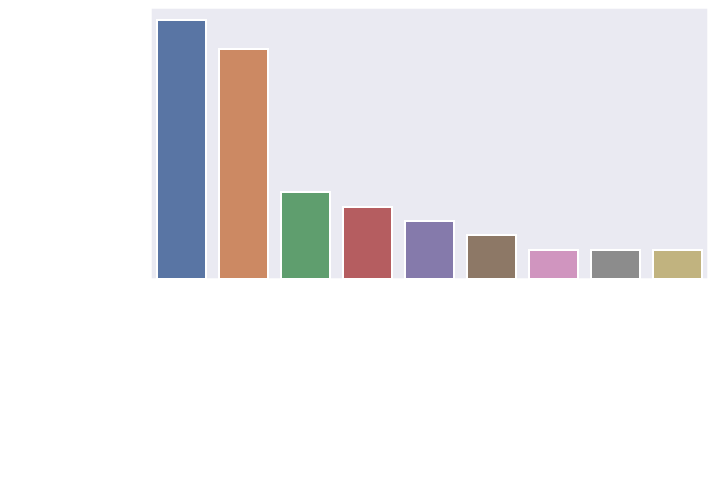

In [21]:
fig = plt.figure(figsize=(10, 5))
builds_count = df_stars6[df_stars6["Sets"] == most_common_set].groupby(["Rune #2", "Rune #4", "Rune #6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 1].sort_values(["Count"], ascending=False) # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Rune #2", "Rune #4", "Rune #6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
ax = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
builds_common.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common_set.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 2

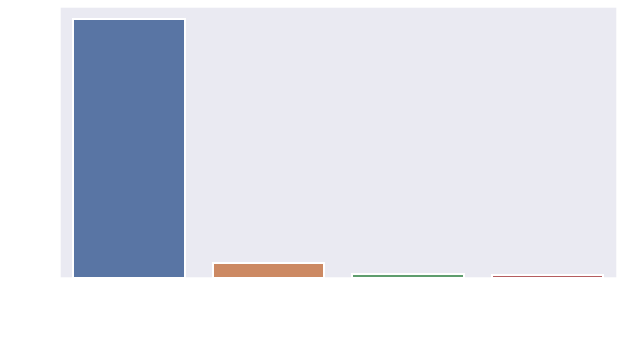

In [22]:
fig = plt.figure(figsize=(10, 5))

counts_slot2 = df_stars6["Rune #2"].value_counts()
counts_slot2 = counts_slot2[counts_slot2 > 1]
x, y = counts_slot2.index, counts_slot2.values
slot2 = sns.barplot(x=x, y=y)
_ = slot2.set_xticklabels(slot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_2.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 4

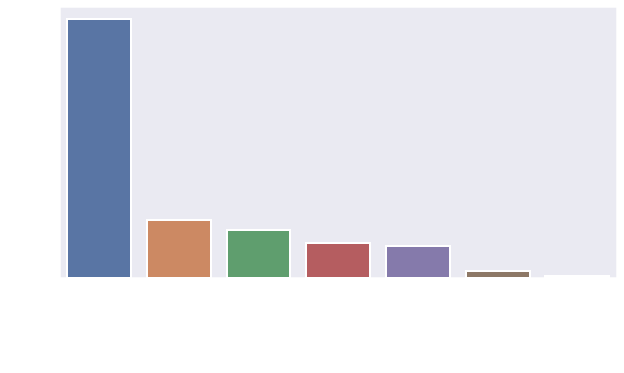

In [23]:
fig = plt.figure(figsize=(10, 5))

counts_slot4 = df_stars6["Rune #4"].value_counts()
counts_slot4 = counts_slot4[counts_slot4 > 1]
x, y = counts_slot4.index, counts_slot4.values
slot4 = sns.barplot(x=x, y=y)
_ = slot4.set_xticklabels(slot4.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_4.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 6

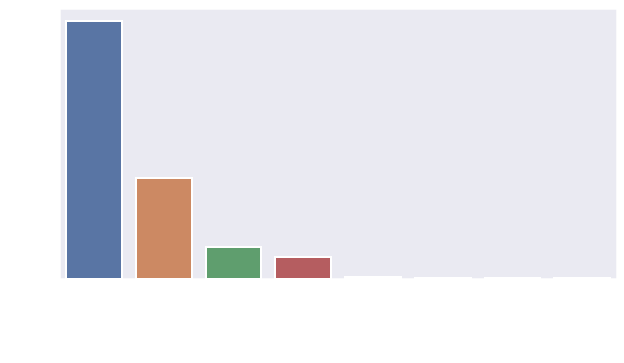

In [24]:
fig = plt.figure(figsize=(10, 5))

counts_slot6 = df_stars6["Rune #6"].value_counts()
counts_slot6 = counts_slot6[counts_slot6 > 1]
x, y = counts_slot6.index, counts_slot6.values
slot6 = sns.barplot(x=x, y=y)
_ = slot6.set_xticklabels(slot6.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_6.png", transparent=True, bbox_inches = "tight")

# Speed Distribution for Will Sets

(171, 24)
270.0


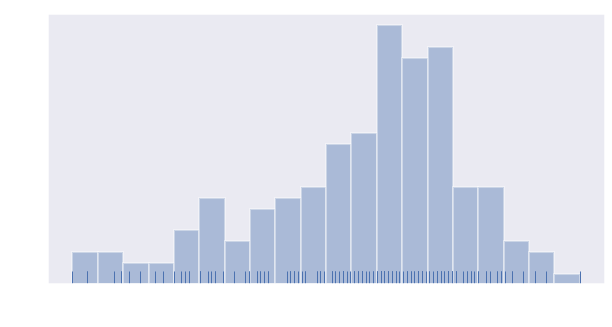

In [25]:
df_will_speed = df_stars6[df_stars6["Sets"].str.contains('Will')]
print(df_will_speed.shape)
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_will_speed["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
print(df_will_speed["Speed"].describe()['max'])
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed_will.png", transparent=True,  bbox_inches = "tight")

# Speed Distribution for Non Will Sets

(309, 24)
269.0


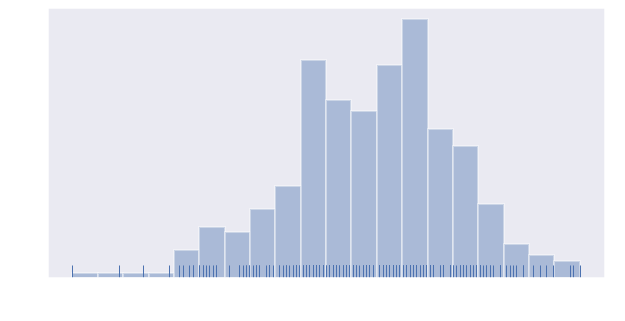

In [26]:
df_non_will_speed = df_stars6[~df_stars6.isin(df_will_speed)].dropna(how='all')
print(df_non_will_speed.shape)
fig = plt.figure(figsize=(10, 5))
print(df_non_will_speed["Speed"].describe()['max'])
sns.distplot(df_non_will_speed["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed_will_not.png", transparent=True,  bbox_inches = "tight")

# Accuracy Distribution

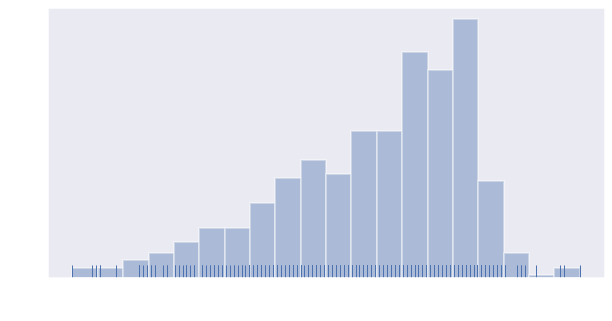

In [27]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Accuracy"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_accuracy.png", transparent=True,  bbox_inches = "tight")